In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Bivariate visualziations
Used to look at relationship between 2 variables.  
In this example we will be looking into the following plots:  


![](2a.PNG)

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### Scatter plot 

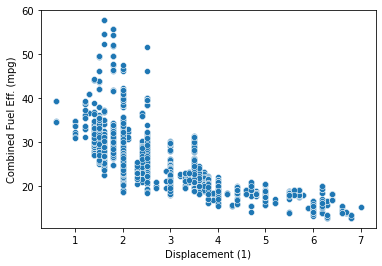

In [3]:
sns.scatterplot(data=fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

#### Alternative Approach - seaborn.regplot()

Seaborn's [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) function combines scatterplot creation with regression function fitting:

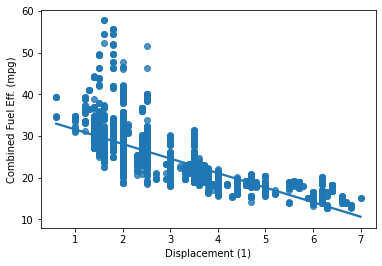

In [4]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Plot the regression line on the transformed data

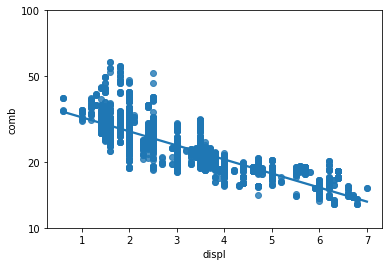

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(data = fuel_econ, x = fuel_econ['displ'], y = fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Cases of overplotting:   

![](2b.PNG)

Resolve overplotting using:
- Sampling
- Transparency
- Jitter

Consider this plot below of 10k data points generated using bivariate normal distribution. 

![](2c.PNG)

Its hard to tell where the drop-off intensity is from the distribution's peaks and how fast it occurs. 

- We can use random sampling to plot a smaller number of points say 800. We can clearly see the gap in peaks where fewer points are plotted. The random selection of points gives us a good intuition for the general distribution of data.  

![](2d.PNG)

- As an alternative strategy, we can still plot our original 10k points but plot each point with some transpareancy instead. Each individual point will be lighter in color but when the points overlap the overlapped regions become darker. The two darkest regions are those with the highest number of points indicating the peaks of the distributions.   
Since a higher density results in a darker color we have in an implied way used color to augment what would have been obscured from using position alone.

![](2e.PNG)

- But what if one or both of our varaiables are discrete?  
Sampling doesnt help at all as any number of overlapping all look the same. Transparency allows us to make density judgement based on color but this loses some of the power available in positional encodings.  

![](2f.PNG)

This is one case we will have to add some jitter. Jittering adds a small amount of random noise to the position of each point so that the multiple data points that have the same values are now spread over a small area. AS long as the jitter keeps each of the discrete values in distinct bands, this can be a big help in the identification and interpretation of trends.

![](2g.PNG)




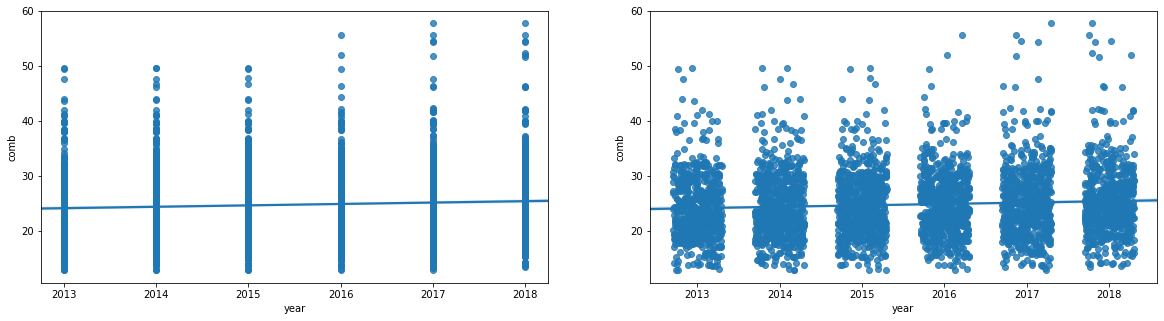

In [6]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). 

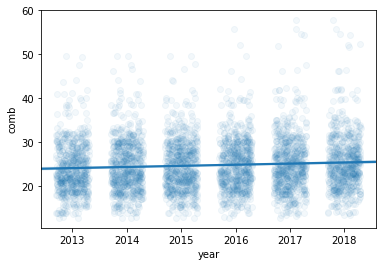

In [7]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
# plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.

Observe the regression line doesn't change with any change in the jitter and transparency setting as its depends on the underlying data only.

## Heatmaps

A heat map is a 2-d version of the histogram (when looked at the data in a top-down perspective) that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Each cell is then given a color based on the count of values. In this example the more data points in a grid cell, the darker the color.

![](2h.PNG)

Since there won't be room for bar heights, counts are indicated instead by grid cell color. 

A heat map can be implemented with Matplotlib's [hist2d()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) function.

![](2i.PNG)

Since assigning values based on color is considered imprecise. You should consider adding count annotations on top of each grid cell, especially if you have only a limited number of cells. 

> A heat map is favoured over a scatterplot when you have 2 discrete variables as the associated jitter scatterplot can be imprecise. Its also alternative to add transparency to a scatterplot when you have a very large amount of data. But just like histogram we must be aware of the binsize on the interpretation of data. Too large a bin size you may fail to see the major trends in the data, and with too small a bin size you may get distracted by the noise.


__Heat maps are useful in the following cases:__
- To represent a plot for discrete vs. another discrete variable
- As an alternative to transparency when the data points are enormous

#### Default heat plot using Matplotlib.pyplot.hist2d() function

In the example below, we added a [colorbar()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html) function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

Similar to univariate `hist()` function by default each dimension is split into 10 bins and the number of points in each rectangular bin is counted up. Each count is associated with a color of the color palette used. 

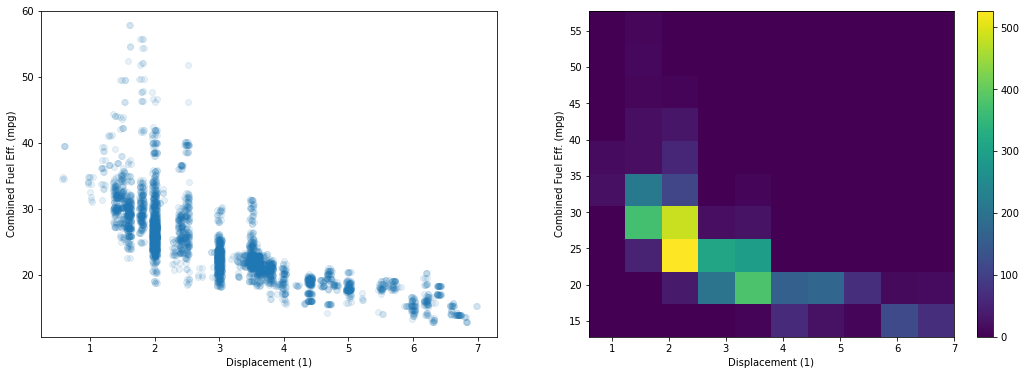

In [8]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

By setting `cmin = 0.5` (i.e, to any value) any bin with no counts will return as not a number and not get coloured in. Since white now reprsents zero. So choosing a color palette were darker colors are associated with higher values.   

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a `cmin = 0.5` parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

`cmap='viridis_r'`: where `_r` represents a reversed color map.



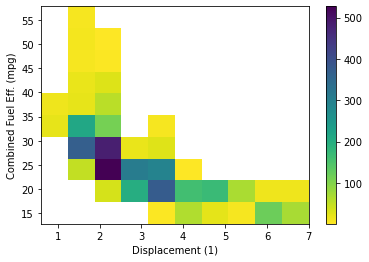

In [9]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

__To change the bins__

We can provide `hist2d()` bin parameter with a list of 2 bins: one for x-axis and other for y-axis in that order. 
AFter looking at the descriptive statistics for the two variables, decided to use bin-sizes of 0.3 for displacement and three for fuel-efficiency.   


In [10]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


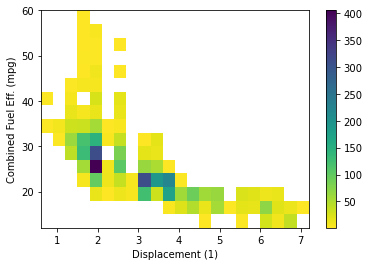

In [11]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Notice the areas of high frequency in the middle of the negative trend in the plot.

***
## Violin plots

Instead of plotting data point individually as in the scatterplot we have a curve individually for each level of categorical variable whose area depicts the distribution of points. In the violin plot, place where the curve is wider we have more data points. 

So North has more points in 50 to 60 range. Central has more points in the 55 to 70 range. South has more points in 55 to 65 range.

So violin plot gives more information than scatterplot.

![](2j.PNG)


Seaborn's [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function can be used to create violin plots.


##### Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

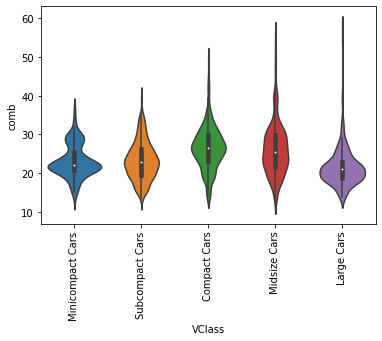

In [12]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sns.violinplot(data=fuel_econ, x='VClass', y='comb');
plt.xticks(rotation=90);

Inside each curve, there is a black shape with a white dot inside, a miniature box plot. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the `inner = None` parameter in the violinplot call to simplify the look of the final visualization.

#### Violin plot without datapoints in the violin interior

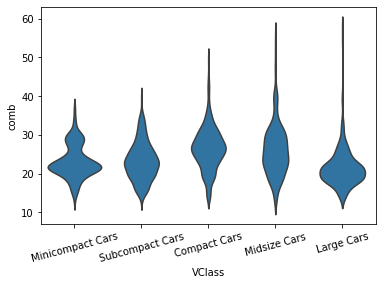

In [13]:
base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

#### Additional Variation
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

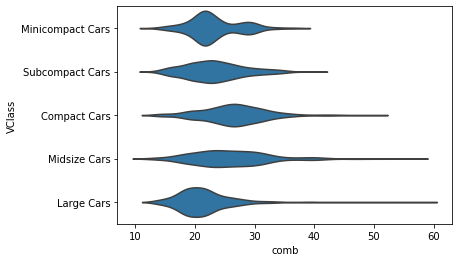

In [14]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

### Box Plots

A __box plot__ is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.

##### Violin versus Box plot



(6.966470319355814, 63.09321945242605)

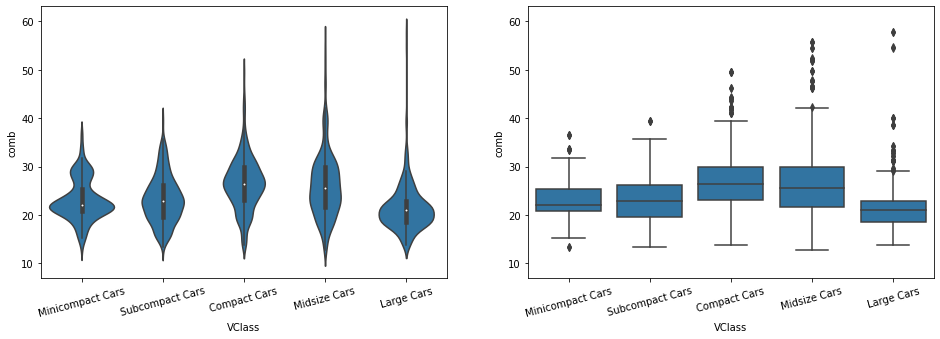

In [15]:
# Step 1. Import packages

# Step 2. Load data

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot


Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to a variable, ax1 is used to programmatically obtain those limit values.

__Documentation:__ [Axes objects](https://matplotlib.org/stable/api/axes_api.html)

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

##### Additional Variations
As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

#### Horizontal box plot

<AxesSubplot:xlabel='comb', ylabel='VClass'>

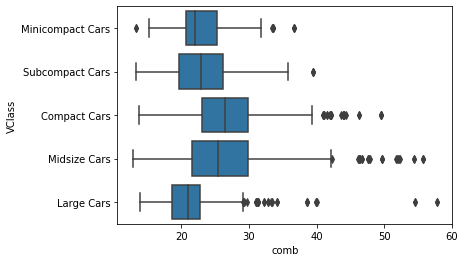

In [16]:
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)

In `violinplot`, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting `inner = 'quartile'`, three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

#### Violin plot with quartile information in the middle

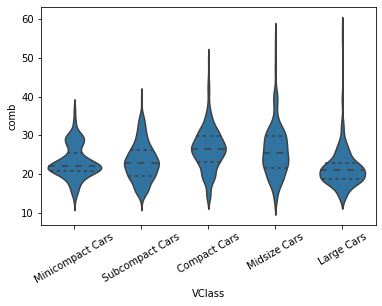

In [17]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

## Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a __clustered bar chart__. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's `countplot` function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

![](2k.PNG)

#### Plot a Bar chart between two qualitative variables

In [18]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [19]:
fuel_econ[['VClass','trans_type']].drop_duplicates()

,VClass,trans_type
0,Subcompact Cars,Automatic
1,Compact Cars,Automatic
4,Midsize Cars,Automatic
8,Subcompact Cars,Manual
11,Compact Cars,Manual
12,Large Cars,Automatic
29,Midsize Cars,Manual
37,Minicompact Cars,Automatic
38,Minicompact Cars,Manual
46,Large Cars,Manual


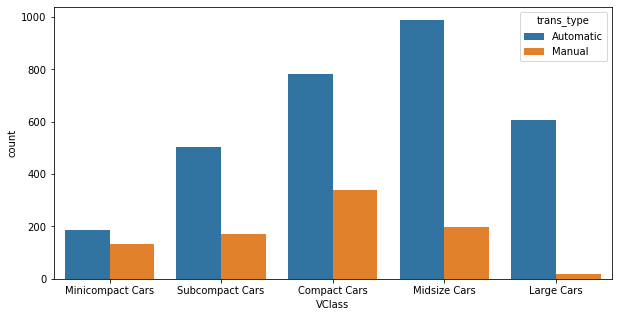

In [20]:
plt.figure(figsize=(10,5));
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

#### Plot a Heat Map between two qualitative variables

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. 
> Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

Step 1.  Get the data into desirable format - a DataFrame

In [21]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [22]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [23]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


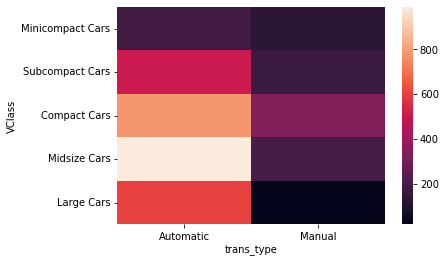

In [24]:
sns.heatmap(ct_counts);

[Documentation pandas dataframe pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

The heat map tells the same story as the clustered bar chart.

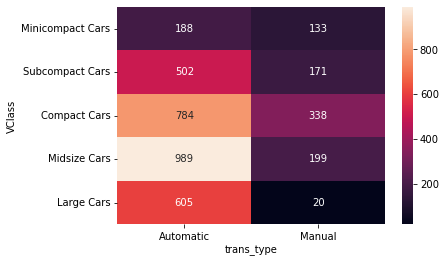

In [25]:
sns.heatmap(ct_counts, annot = True, fmt = 'd');

`annot = True` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding `fmt = 'd'` means that annotations will all be formatted as integers instead. You can use `fmt = '.0f'` if you have any cells with no counts, in order to account for NaNs.

***

## Faceting

__Faceted plot__: Multiple copies of the same type of plot visualized on different subsets of data.

A violin plot is similar to a set of histograms faceted by a categorical variable.

![](2l.PNG)


Faceting is good for breaking down the potentially complex patterns into simpler patterns. This is especially useful if you have a categorical varaiable with a lot of levels. 

![](2m.PNG)

The above plot shows user-registration dates faceted by month and aranged in a 3x4 grid. Seperating things out into multiple bar charts into a single long bar chart makes it easier to see unusual number of Jan 1st registrations. One thing to make sure while faceting is that your axis scales and limits are consistent across each subplots. A failure to have same axis scales and limits can lead to have easier to have misconceptions about the overall frequency or value range for each subset of data.

For example:

![](2n.PNG)

Plot on RHS fixes the axis ranges and shows that there are more points on the axis ranges and shows that there are more points on axis of group B and those points generally are higher value than that of A.

Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. 
- First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). 
- Then we use the `map` method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

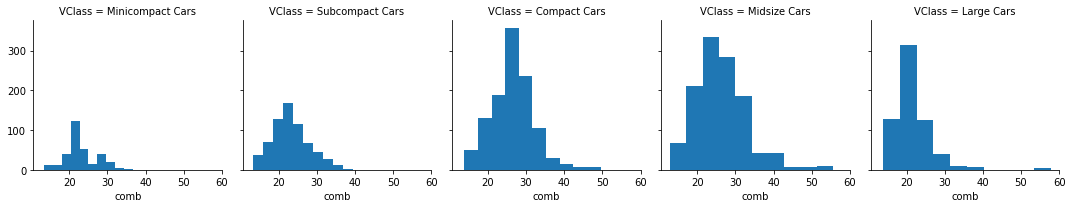

In [26]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = fuel_econ, col = 'VClass');
g.map(plt.hist, "comb");

In the `map` call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like `x = "comb"`, or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from `hist` to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the `map` function.

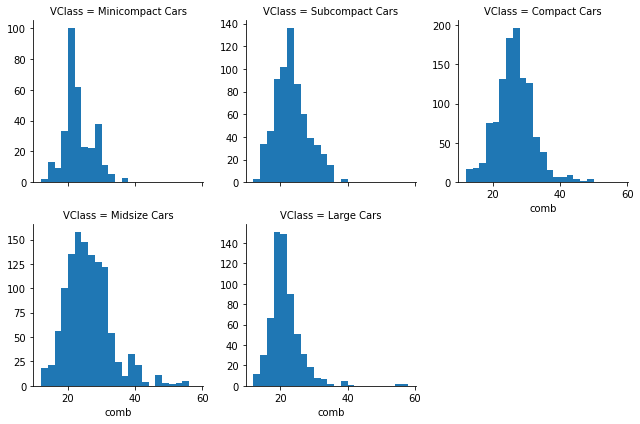

In [27]:
bin_edges = np.arange(12, 58+2, 2)
# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

##### Additional Variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting `col_wrap = 7` means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

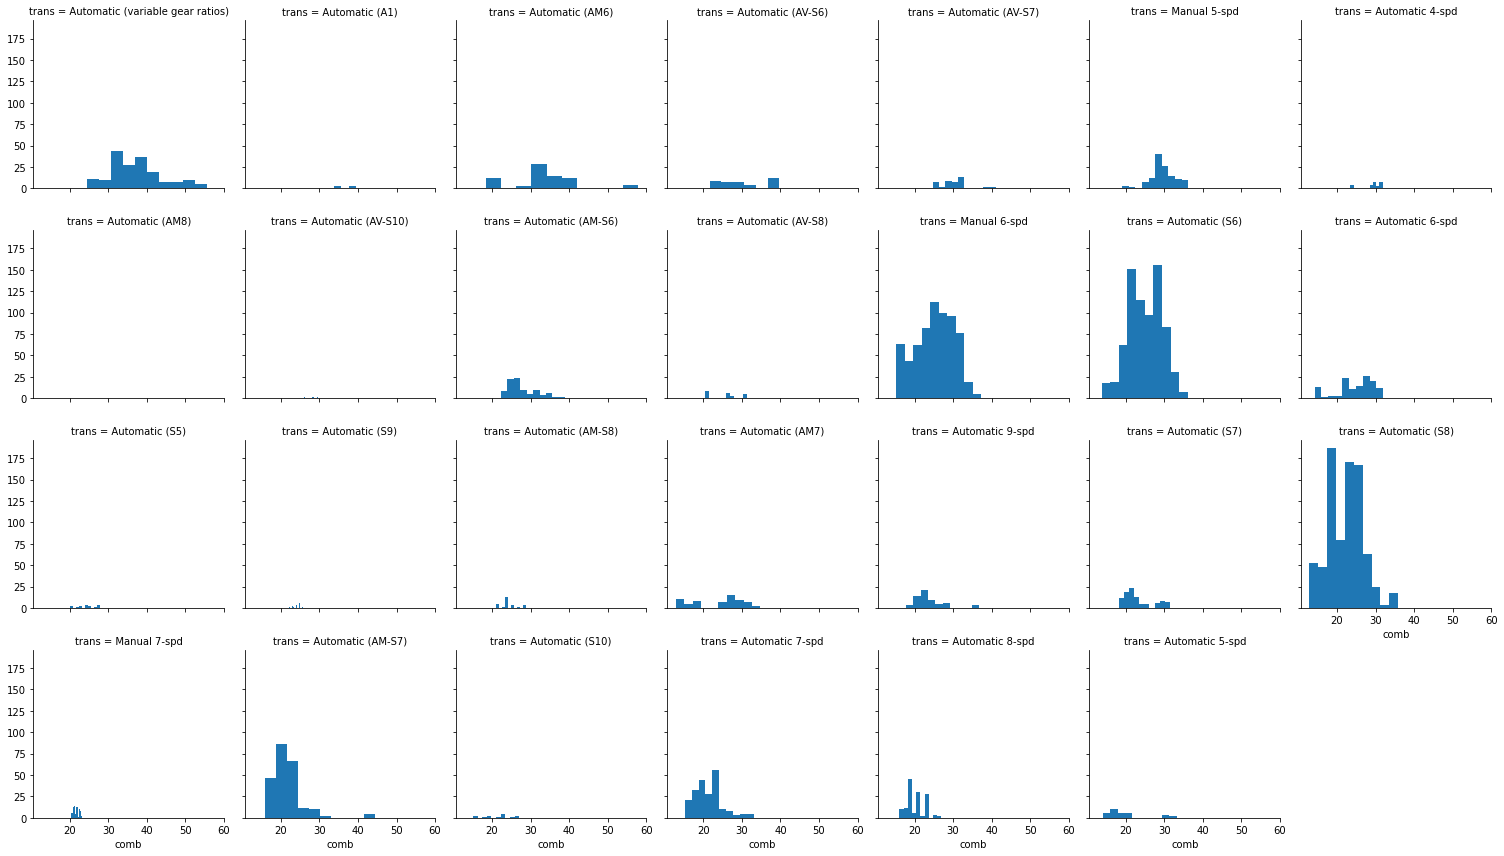

In [28]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

## [Pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html)

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

It is important to keep in mind that a point plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

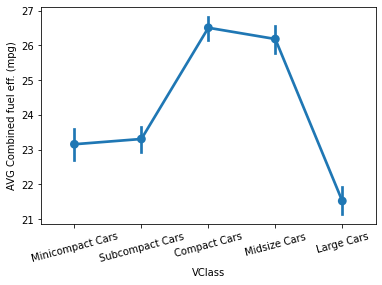

In [30]:
sns.pointplot(data=fuel_econ, x = 'VClass', y = 'comb');
plt.xticks(rotation = 15);
plt.ylabel('AVG Combined fuel eff. (mpg)');

## Line plot

- Lines imply relative change.  
- Lines emphasize trends across x-values. 
- Used for time related graphs.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

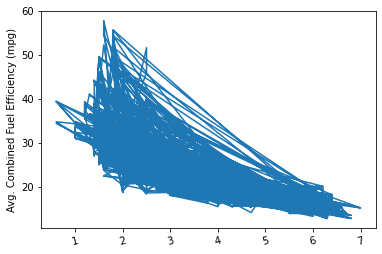

In [29]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

#### errorbar

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [32]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned.head()

0    (3.6, 3.8]
1    (1.8, 2.0]
2    (3.4, 3.6]
3    (3.4, 3.6]
4    (2.2, 2.4]
Name: displ, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

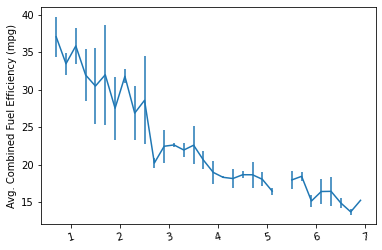

In [33]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

References:
1. [Sample plots in Matplotlib](https://matplotlib.org/3.3.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)
2. [Sample plots in Seaborn](https://seaborn.pydata.org/examples/index.html)
3. [Seaborn functions](https://seaborn.pydata.org/api.html)
4. [Matplotlib functions](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)